In [151]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [152]:
# data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\res_theo_exp1.csv")
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_all_no_noise.csv")
data.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data=data[data.pxt<=0.06]
data=data.drop_duplicates()
print(data.shape)

(169271, 28)


In [153]:
data2=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_i1_noise.csv")
data2.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data2=data2[data2.pxt<=0.06]
data2=data2.drop_duplicates()
print(data2.shape)

(169271, 28)


In [154]:
data=data[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2']]
data2=data2[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2']]

temp_merged=data.merge(data2,on=['pep','pxt'])
print(temp_merged.shape)


(169271, 14)


In [155]:
# def new_pxt(pxt,delta2_x,delta1_x,i1_x,i0_x,i2_x):
#     return 1 +(0.5/( (delta2_x/delta1_x) - (i1_x/i0_x) + (0.5*delta1_x) - 0.5))
def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
    return 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x/i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))

In [156]:
k=58
temp_merged=data.merge(data2,on=['pep','pxt'])
temp_merged=temp_merged.loc[k:k,:]
temp_merged=temp_merged.reset_index(drop=True)
temp_merged

,pep,cpxt_x,pxt,delta1_x,delta2_x,i0_x,i1_x,i2_x,cpxt_y,delta1_y,delta2_y,i0_y,i1_y,i2_y
0,DSTLIMQLLR,0.0591,0.0591,1.005318,1.128255,0.183086,0.303286,0.258738,-0.019583,0.980377,1.128255,0.183086,0.298719,0.258738


In [157]:
temp_res=[]
temp_pxt=[]
for index in range(1):#temp_merged.shape[0]):
    pxt        =temp_merged.pxt[index]
    delta2_x   =temp_merged.delta2_x[index]
    delta1_x   =temp_merged.delta1_x[index]
    i1_x       =temp_merged.i1_x    [index]
    i0_x       =temp_merged.i0_x    [index]
    i2_x       =temp_merged.i2_x    [index]
    i1_0_i0_0=delta1_x-(i1_x/i0_x)
    
    x=i1_x
    res=[]
    xs=[]
    ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
    print(ccpxt,pxt)
    
#     for i in range(1,10):        
#         xs.append(x+i*x/100)        
#         temp_res.append(i)
#         temp_pxt.append( 100*abs(new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)          
#         xs.append(x-i*x/100)
#         temp_res.append(i)
#         temp_pxt.append( 100*abs(new_pxt(xs[-1],delta1_x,i1_x,i0_x) -ccpxt)/ccpxt)  
    for i in range(1,100):    
        
        xs.append(x+i*x/1000)   
        temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
        
        temp_res.append( 100*abs(x - (x+i*x/1000))/x)
        temp_pxt.append( 100*abs(new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
#         print(i,ccpxt,new_pxt(xs[-1],delta1_x,i1_x,i0_x),temp_pxt[-1])          
        
#         xs.append(x-i*x/1000)
#         temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
        
#         temp_res.append( 100*abs(x - (x -i*x/1000))/x)
#         temp_pxt.append( 100*abs(new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt) 
#         print(i,ccpxt,new_pxt(xs[-1],delta1_x,i1_x,i0_x),temp_pxt[-1],end="\n\n") 
    

0.059393571135023304 0.0591


9.899999999999995


,xs,res
14,0.554908,1.5
15,2.930108,1.6
13,4.056786,1.4
16,6.398387,1.7
12,7.575651,1.3


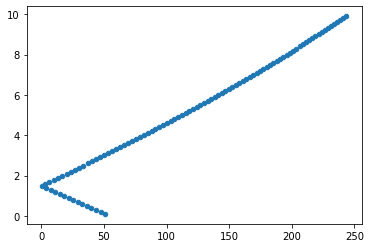

In [158]:
df=pd.DataFrame([temp_pxt,temp_res]).transpose()
df.columns=['xs','res']
# df=df[ df['xs']<20 ]
print(df.res.max())
plt.scatter(df['xs'],df.res,s=20)
df.sort_values(by='xs').head()

In [159]:
def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
    return 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x/i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))
    

In [160]:
all_res=[]
for k in range(59):#35,36):#20,21):#59
    k=k + 2*59
    temp_merged=data.merge(data2,on=['pep','pxt'])
    temp_merged=temp_merged.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
    print(k,temp_merged.pep)
    
    temp_res=[]
    temp_pxt=[]
    for index in range(1):#temp_merged.shape[0]):
        pxt        =temp_merged.pxt[index]
        delta2_x   =temp_merged.delta2_x[index]
        delta1_x   =temp_merged.delta1_x[index]
        i1_x       =temp_merged.i1_x    [index]
        i0_x       =temp_merged.i0_x    [index]
        i2_x       =temp_merged.i2_x    [index]
        
        i1_0_i0_0=delta1_x-(i1_x/i0_x)    
        x=i1_x
        
        res=[]
        xs=[]
        ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
#         print(pxt,ccpxt)
         
        for i in range(1,50):        
            xs.append(x+i*x/1000)   
            temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0

            temp_res.append( 100*abs(x - (x+i*x/1000))/x)
            temp_pxt.append( 100*abs(new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
#             print('\t',pxt,ccpxt,delta2_x,xs[-1],temp_res[-1],new_pxt(xs[-1],delta1_x,i1_x,i0_x),temp_pxt[-1])

            xs.append(x-i*x/1000)
            temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
            temp_res.append( 100*abs(x - (x -i*x/1000))/x)
            temp_pxt.append( 100*abs(new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
            
#             print('\t',pxt,ccpxt,delta2_x,xs[-1],temp_res[-1],new_pxt(xs[-1],delta1_x,i1_x,i0_x),temp_pxt[-1])
    df=pd.DataFrame([temp_pxt,temp_res]).transpose()
    all_res.append([temp_res,temp_pxt])
#     df=pd.DataFrame([temp_pxt,temp_res]).transpose()
#     df.columns=['xs','res']
#     df=df[ df['xs']<20 ]
#     all_res.append([pxt,df.shape[0],df.res.max()])


118 0    AVTEQGHELSNEER
Name: pep, dtype: object
119 0    AVTEQGHELSNEER
Name: pep, dtype: object
120 0    AVTEQGHELSNEER
Name: pep, dtype: object
121 0    AVTEQGHELSNEER
Name: pep, dtype: object
122 0    AVTEQGHELSNEER
Name: pep, dtype: object
123 0    AVTEQGHELSNEER
Name: pep, dtype: object
124 0    AVTEQGHELSNEER
Name: pep, dtype: object
125 0    AVTEQGHELSNEER
Name: pep, dtype: object
126 0    AVTEQGHELSNEER
Name: pep, dtype: object
127 0    AVTEQGHELSNEER
Name: pep, dtype: object
128 0    AVTEQGHELSNEER
Name: pep, dtype: object
129 0    AVTEQGHELSNEER
Name: pep, dtype: object
130 0    AVTEQGHELSNEER
Name: pep, dtype: object
131 0    AVTEQGHELSNEER
Name: pep, dtype: object
132 0    AVTEQGHELSNEER
Name: pep, dtype: object
133 0    AVTEQGHELSNEER
Name: pep, dtype: object
134 0    AVTEQGHELSNEER
Name: pep, dtype: object
135 0    AVTEQGHELSNEER
Name: pep, dtype: object
136 0    AVTEQGHELSNEER
Name: pep, dtype: object
137 0    AVTEQGHELSNEER
Name: pep, dtype: object
138 0    AVTEQGHELSN

In [161]:
# pd.DataFrame(all_res).transpose()
df=pd.DataFrame()
for x in all_res:
    df=pd.concat([df,pd.DataFrame(x)],axis=1)
df=df.transpose()
df.columns=['er','px']
# df=df[df.px<20]

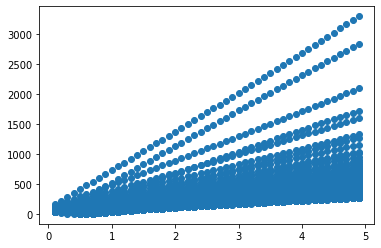

In [162]:
plt.scatter(df.er,df.px)

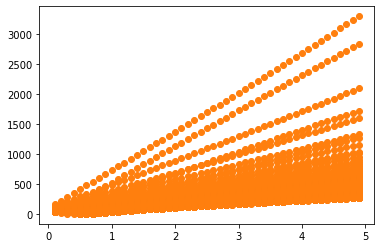

In [163]:
# df2=df
plt.scatter(df2.er,df2.px)
plt.scatter(df.er,df.px)

In [164]:
df2

,er,px
0,0.1,56.964147
1,0.1,76.703836
2,0.2,47.161799
3,0.2,86.641809
4,0.3,37.404034
...,...,...
93,4.7,586.753174
94,4.8,360.088268
95,4.8,599.187137
96,4.9,368.087495
